# Problem Statement:
In this data we have one independent variable (hours of study) also called Features and one dependent variable ("Marks") called as target. You have to train the SVR model to understand the relationship between the hours of study and marks of the student to predict the student's marks based on the number of hours of study.


# Importing all the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset

In [ ]:
# Importing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv")

In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


# EDA

#
Here marks is not in the form of categorical data it is continuous so we will use linear Regression model  instead of classifier

In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
df.tail()

,Hours of Study,Marks
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [ ]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.isna()

,Hours of Study,Marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
95,False,False
96,False,False
97,False,False
98,False,False


In [ ]:
df.isna().sum()

Hours of Study    0
Marks             0
dtype: int64

In [ ]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

In [ ]:
df.rename(columns={"Hours of Study":"Hours"},inplace=True)

In [ ]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


Text(0.5, 1.0, 'Hours of study v/s Marks')

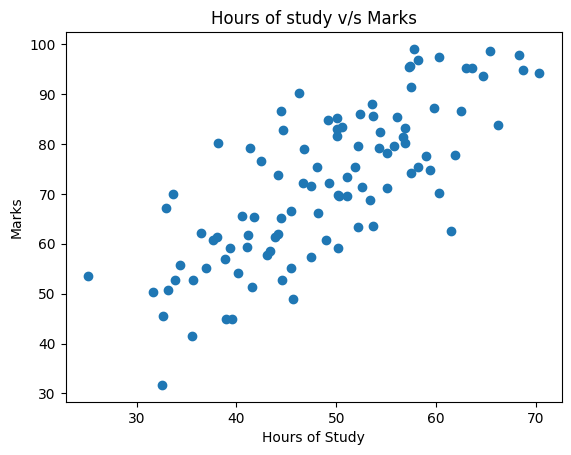

In [ ]:
plt.scatter(df.Hours,df.Marks)
plt.xlabel("Hours of Study")
plt.ylabel("Marks")
plt.title("Hours of study v/s Marks")

Conclusion:
Scatter is here helpful to find out the datapoints and the relationship between the features.
We can say from above graph that is the student has studied for more number of hours then the student can score more marks. It means there is a positive correlation between Hours and Marks.

<Axes: >

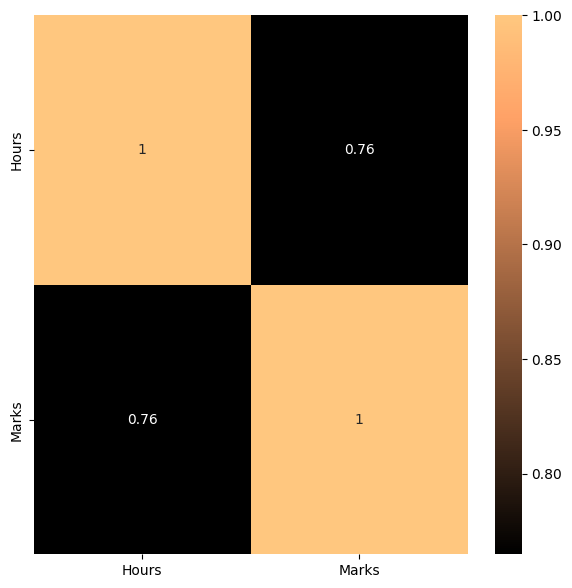

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='copper')

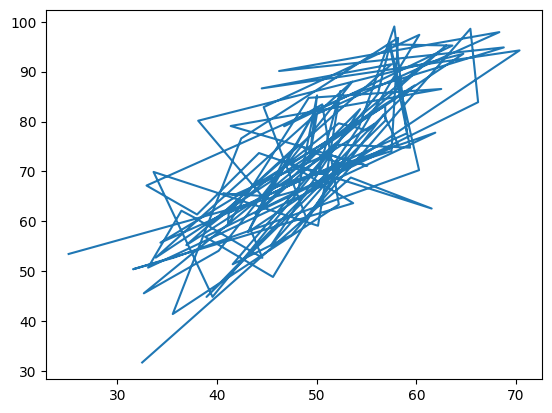

In [ ]:
plt.plot(df.Hours,df.Marks)

Conclusion: Line plot is not helping us to understand the relationship between the features so Scatter plot is only Helpful.

# Feature Scaling
It will going to scale all the values between the range of -1 to 1 for the accuracy of the model to train.

-> Standardization

-> Normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
stanscale = StandardScaler()

In [ ]:
x = stanscale.fit_transform(x.reshape(-1,1))
y = stanscale.fit_transform(y.reshape(-1,1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
x_train.shape

(80, 1)

In [ ]:
len(x_train)

80

In [ ]:
len(x_test)

20

In [ ]:
len(y_train)

80

In [ ]:
len(y_test)

20

# New Section

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel = 'rbf')

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_predict

array([-0.76928135,  0.62496881, -0.36640795, -1.26278707,  0.57374957,
       -0.11917135, -0.7564597 , -0.40446329, -0.9959721 ,  0.95314283,
        1.07454549,  0.34992006, -0.56332387, -0.52103835,  0.07480908,
        1.22626364,  1.3384446 ,  0.67606523, -0.56969763, -0.64779117])

In [ ]:
y_test

array([[-1.00224427],
       [ 0.62160848],
       [-0.70156137],
       [-1.40938966],
       [ 0.89018186],
       [-0.03229448],
       [-1.79768014],
       [-0.89032789],
       [-0.65528619],
       [-0.11790059],
       [-0.62633786],
       [-0.21538463],
       [-0.68441449],
       [-0.44658889],
       [ 0.62827334],
       [ 1.46933383],
       [ 1.50879256],
       [ 1.54854301],
       [-0.8381571 ],
       [-1.18692938]])

In [ ]:
y_predict = y_predict.reshape(-1, 1)
y_predict = stanscale.inverse_transform(y_predict)

In [ ]:
y_predict

array([[-0.76928135],
       [ 0.62496881],
       [-0.36640795],
       [-1.26278707],
       [ 0.57374957],
       [-0.11917135],
       [-0.7564597 ],
       [-0.40446329],
       [-0.9959721 ],
       [ 0.95314283],
       [ 1.07454549],
       [ 0.34992006],
       [-0.56332387],
       [-0.52103835],
       [ 0.07480908],
       [ 1.22626364],
       [ 1.3384446 ],
       [ 0.67606523],
       [-0.56969763],
       [-0.64779117]])

In [ ]:
y_test = stanscale.inverse_transform(y_test)

In [ ]:
y_test

array([[-1.00224427],
       [ 0.62160848],
       [-0.70156137],
       [-1.40938966],
       [ 0.89018186],
       [-0.03229448],
       [-1.79768014],
       [-0.89032789],
       [-0.65528619],
       [-0.11790059],
       [-0.62633786],
       [-0.21538463],
       [-0.68441449],
       [-0.44658889],
       [ 0.62827334],
       [ 1.46933383],
       [ 1.50879256],
       [ 1.54854301],
       [-0.8381571 ],
       [-1.18692938]])

Text(0, 0.5, 'Predicted Marks')

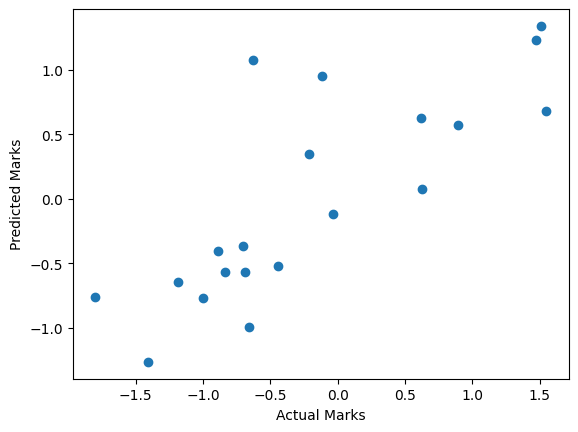

In [ ]:
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")

In [ ]:
model.score(x_test,y_test)

0.5941571832406786

In [ ]:
r2_score(y_test,y_predict)

0.5941571832406785

In [ ]:
mean_squared_error(y_test,y_predict)

0.3815173452640769

In [ ]:
mean_absolute_error(y_test,y_predict)

0.45844443939691193